In [1]:
# Name - Suraj Chouhan
# Enroll - 0818CS191181

In [38]:
 #Import scikit-learn dataset library
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score

%matplotlib inline
 

In [39]:
adult = pd.read_csv('adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [40]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [41]:
def show(adult):
  for i in adult.columns[1:]:
    print("Feature: {} with {} Levels".format(i,adult[i].unique()))

show(adult)

Feature: workclass with ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] Levels
Feature: fnlwgt with [226802  89814 336951 ... 129912 255835 257302] Levels
Feature: education with ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] Levels
Feature: educational-num with [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] Levels
Feature: marital-status with ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] Levels
Feature: occupation with ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] Levels
Feature: relationship with ['Own-child' 'Husband' 'Not-in-fa

In [42]:
adult.isnull().sum() 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [43]:
adult.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [49]:
encoder = ce.OrdinalEncoder(cols = ['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income'])
adult = encoder.fit_transform(adult)
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,2,2,2,2,2,2,2,1,1,1,2,1,1
2,3,2,3,3,3,2,3,2,2,1,1,1,1,1,2
3,4,1,4,4,4,2,1,2,1,1,2,1,1,1,2
4,5,3,5,4,4,1,4,1,2,2,1,1,3,1,1


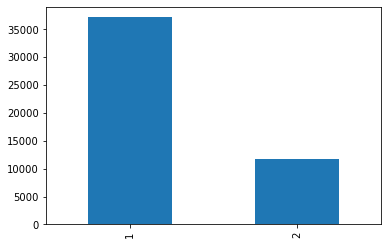

In [50]:
#Plotting the Class variable
adult['income'].value_counts().plot(kind = 'bar')
plt.show()

In [51]:
#Splitting Data into Train Test
x = adult.drop(['income'], axis = 1)
y = adult['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print("X_train: {}".format(x_train.shape))
print("X_test: {}".format(x_test.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (34189, 14)
X_test: (14653, 14)
Y_train: (34189,)
Y_test: (14653,)


In [52]:
#Creating Evaluation Parametric Function
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

In [53]:
#Random Forest
rf = RandomForestClassifier(max_depth = 7,random_state = 48) # Keeping max_depth = 7 same as DT
rf.fit(x_train,y_train)

yp_train = rf.predict(x_train)
yp_test = rf.predict(x_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.86      0.95      0.90     25922
           2       0.78      0.50      0.61      8267

    accuracy                           0.84     34189
   macro avg       0.82      0.73      0.76     34189
weighted avg       0.84      0.84      0.83     34189

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.86      0.96      0.91     11233
           2       0.78      0.50      0.61      3420

    accuracy                           0.85     14653
   macro avg       0.82      0.73      0.76     14653
weighted avg       0.84      0.85      0.84     14653

--------------------------------------------------------------------------
Accuracy on Train Data is: 0.84
Accuracy on Test Data is: 0.85
------------------------------------------------------------